# CAP 5768 - Data Science - Adam Corbin- Fall 2019

## FINAL PROJECT
## Starter code

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To get acquainted with representative datasets and problems in data science and machine learning
- To learn how to implement several different machine learning models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in 3 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 195 (plus up to 100 bonus points).

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [3]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss

-------------------
## Part 1: Decision trees

In this part, we will take another look at the Iris dataset.

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.1 Your turn! (25 points)

Write code to: 

1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset. (15 pts)
2. Compute relevant summary statistics for each species. (10 pts)

## Solution

#1.1.1


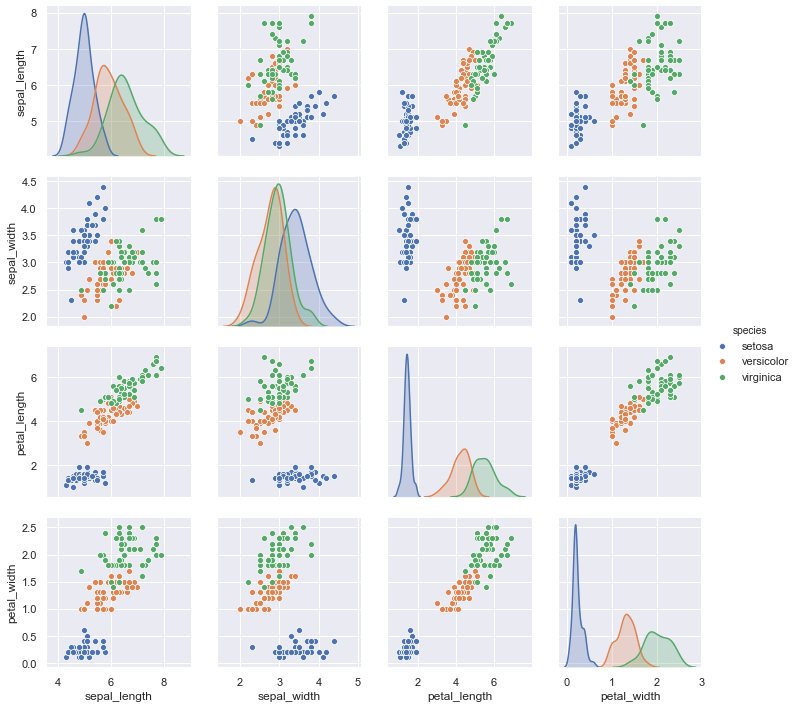

In [13]:
print("#1.1.1")
g = sns.pairplot(iris, hue="species")

In [14]:
print("#1.1.2")
for _type in iris["species"].unique():
    print(_type)
    print(iris[iris["species"] == _type].describe())
    print()


#1.1.2
setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.3

## 1.2 Your turn! (35 points)

Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (10 pts)
2. Plot the resulting decision tree. It should look similar to the plot below. (15 pts)
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. (10 pts)

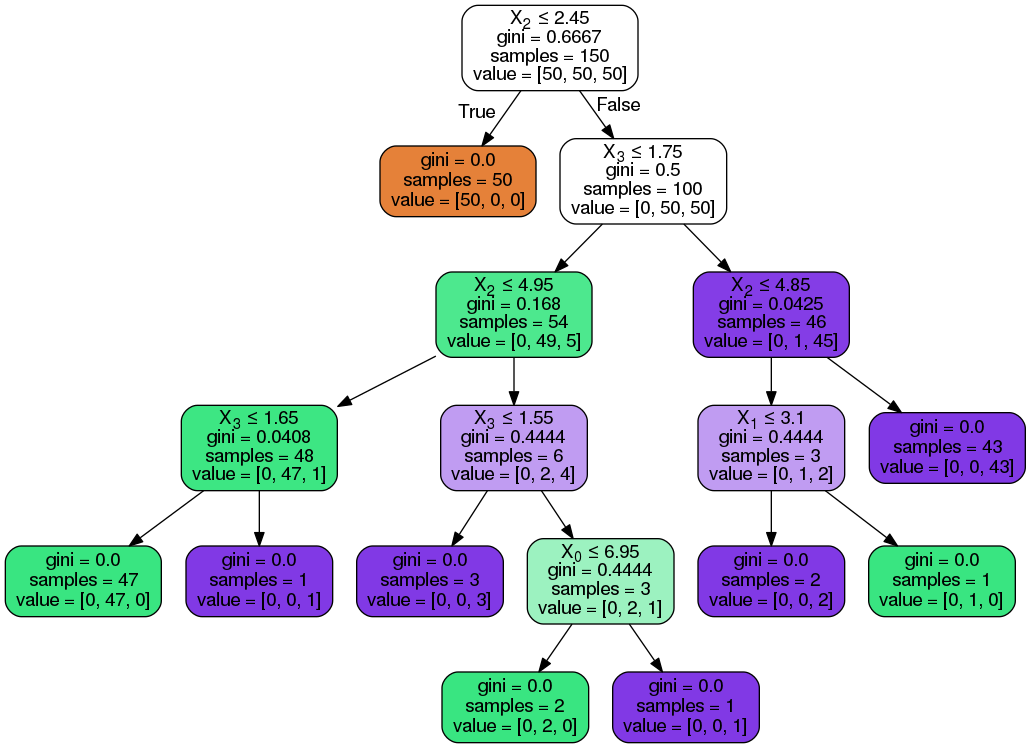

## Solution

In [4]:
print("#1.2.1")
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
model = tree.DecisionTreeClassifier(random_state=0)
model = model.fit(iris.data, iris.target)

#1.2.1


In [5]:
from sklearn.tree.export import export_text

print("#1.2.2")
r = export_text(model, feature_names=iris['feature_names']) 
print(r)

#1.2.2
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



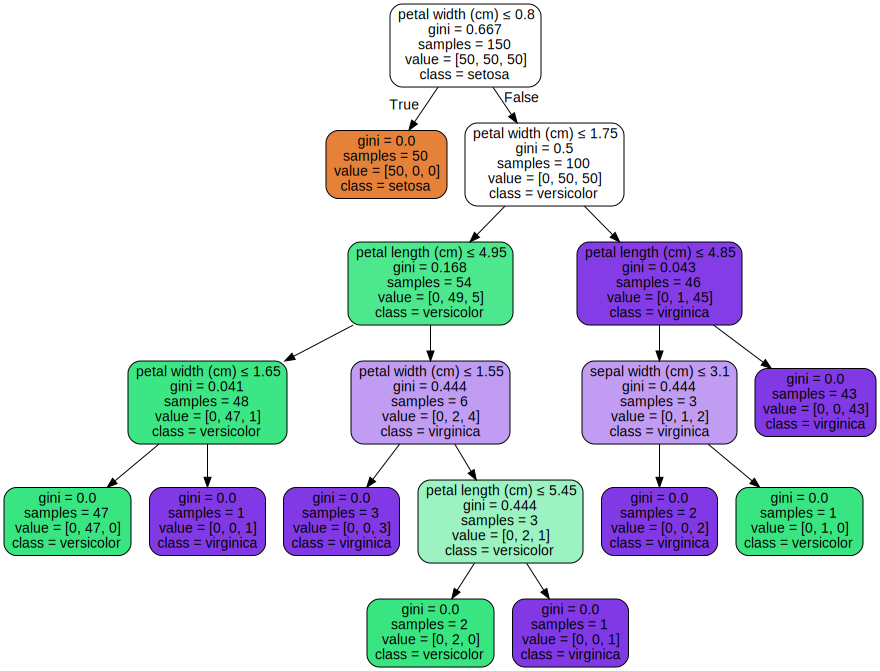

In [10]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [17]:
from sklearn.model_selection import cross_val_score
print("#1.2.3")
cross_val_score(model, iris.data, iris.target, cv=3)

#1.2.3


array([0.98039216, 0.92156863, 1.        ])

## Bonus opportunity 1 (15 points)

Make meaningful changes to the baseline code, e.g., trying different combinations of functions to measure the quality of a split, limiting the maximum depth of the tree, etc. 

Publish the code, the results, and comment on how they differ from the baseline (and your intuition as to *why* they do).

## Solution

In [5]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

-------------------
## Part 2: Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. They are saved in the csv data files `mnist_train.csv` and `mnist_test.csv`. 

Every line of these files consists of a grayscale image and its label, i.e. 785 numbers between 0 and 255:
- The first number of each line is the label, i.e. the digit which is depicted in the image. 
- The following 784 numbers are the pixels of the 28 $\times$ 28 image.

The Python code below loads the images from CSV files, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [4]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

In [5]:
test_data.shape

(10000, 785)

In [6]:
train_imgs = np.asfarray(train_data[:, 1:])/255.0
test_imgs = np.asfarray(test_data[:, 1:])/255.0
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [7]:
train_labels.shape

(60000, 1)

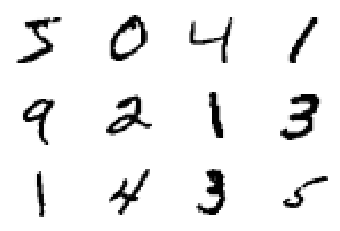

In [8]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_imgs[i].reshape((28,28)), cmap="Greys")
    axi.set(xticks=[], yticks=[])

## 2.1 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy will be around 83.5%

## Solution

In [9]:
from sklearn.naive_bayes import MultinomialNB
print("2.1.1")
clf = MultinomialNB()
model = clf.fit(train_imgs,train_labels.ravel())

2.1.1


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("2.1.2")
y_predict = model.predict(test_imgs)
y_true = test_labels.ravel()
print("accuracy:", accuracy_score(y_true, y_predict))
confusion_matrix(y_true, y_predict)

2.1.2
accuracy: 0.8357


array([[ 912,    0,    2,    6,    1,    8,   14,    1,   36,    0],
       [   0, 1061,    5,    9,    0,    1,    6,    0,   52,    1],
       [  15,   11,  858,   24,   10,    3,   32,   12,   66,    1],
       [   4,   11,   34,  852,    1,   19,    7,   14,   41,   27],
       [   2,    2,    6,    0,  731,    0,   25,    1,   38,  177],
       [  23,   12,    6,  108,   18,  586,   17,    6,   79,   37],
       [  18,   13,   17,    1,    8,   24,  859,    0,   18,    0],
       [   1,   21,   11,    5,   18,    0,    1,  861,   41,   69],
       [   6,   26,   13,   55,   14,   27,    8,    9,  776,   40],
       [   6,    8,    3,   11,   65,    9,    1,   18,   27,  861]],
      dtype=int64)

## 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy should be > 90%

## Solution

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model = model.fit(train_imgs, train_labels.ravel())
y_predict = model.predict(test_imgs)
y_true = test_labels.ravel()
print("accuracy:", accuracy_score(y_true, y_predict))
confusion_matrix(y_true, y_predict)

C:\Users\C0rbin\Anaconda3\envs\assignment_1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy: 0.9469


array([[ 969,    2,    1,    0,    0,    0,    4,    1,    2,    1],
       [   0, 1120,    4,    4,    1,    1,    2,    0,    3,    0],
       [   9,    1,  980,    5,    3,    1,    6,   11,   14,    2],
       [   1,    1,   12,  955,    0,   16,    1,    7,   12,    5],
       [   2,    3,    2,    1,  936,    0,    6,    3,    8,   21],
       [   7,    2,    2,   34,    8,  812,   10,    2,    5,   10],
       [  16,    3,    3,    1,    4,   12,  917,    0,    2,    0],
       [   4,    8,   27,    1,    6,    0,    0,  967,    4,   11],
       [   6,    1,   13,   22,    6,   16,    7,    9,  886,    8],
       [   9,    4,    6,   11,   29,    8,    1,    7,    7,  927]],
      dtype=int64)

## 2.3 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

## Solution

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=30, min_samples_split=10)
model = model.fit(train_imgs, train_labels.ravel())
y_predict = model.predict(test_imgs)
y_true = test_labels.ravel()
print("accuracy:", accuracy_score(y_true, y_predict))
confusion_matrix(y_true, y_predict)

accuracy: 0.9634


array([[ 969,    0,    1,    0,    0,    2,    3,    1,    3,    1],
       [   0, 1125,    3,    2,    0,    0,    3,    0,    2,    0],
       [   6,    0,  987,    6,    4,    0,    4,   14,   11,    0],
       [   0,    0,   10,  965,    0,   12,    0,    9,   11,    3],
       [   1,    0,    2,    0,  947,    0,    6,    2,    2,   22],
       [   3,    0,    2,   15,    4,  852,    7,    2,    4,    3],
       [   9,    3,    1,    0,    4,    6,  933,    0,    2,    0],
       [   2,    5,   20,    6,    2,    0,    0,  977,    4,   12],
       [   3,    0,    6,   11,    3,    7,    5,    4,  924,   11],
       [   4,    4,    2,    9,   13,    7,    1,    5,    9,  955]],
      dtype=int64)

### Rationale on parameters
I was doing a little research and found an interesting article on Random Forest Classifiers and found changing up the criterion to entropy increase the accuracy. Also changing the n_estimators increased it a little bit as well. They also change the min_samples_split but that didnt really adjust the accuracy much. Here is the source of where I found this from: https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

-------------------
## Part 3: Face Recognition 

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

Hint: you will have to install Pillow for this part. See https://pillow.readthedocs.io/en/stable/

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


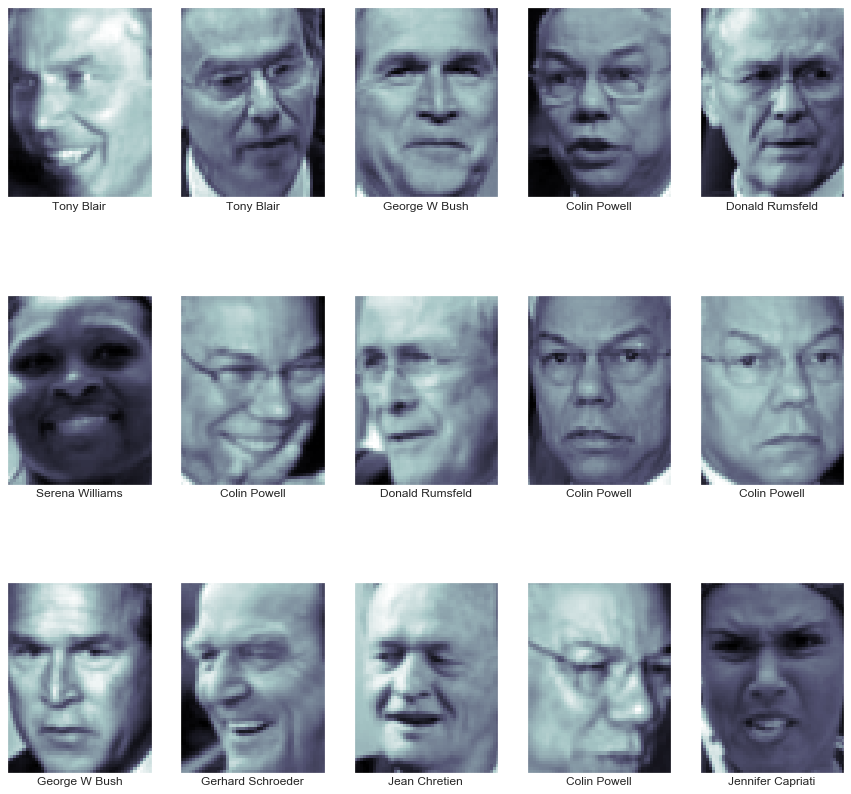

In [11]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 3.1 Your turn! (55 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. (10 pts)
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. (10 pts)
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. (25 pts)
4. Display examples of correct and incorrect predictions (at least 5 of each). (10 pts)

## Solution

In [13]:
from sklearn.decomposition import PCA
X = faces.data
y = faces.target
print("3.1.1")
pca = PCA(n_components=120, svd_solver='randomized', whiten=True).fit(X)


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print("3.1.2")
X_pca = pca.transform(X)

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_pca, y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

3.1.2


C:\Users\C0rbin\Anaconda3\envs\assignment_1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
print("3.1.3")

In [ ]:
print("3.1.4")

## Bonus opportunity 2 (35 points)

Make meaningful changes to the baseline code, e.g.:

- trying different combinations of SVM parameters following a grid search cross-validation approach.
- experimenting with different values of number of components for the PCA and showing how much of the variance they explain (i.e., plotting the cumulative explained variance as a function of the number of components).
- using "data augmentation" to generate additional training images (for under-represented classes).

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [18]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Bonus opportunity 3 (50 points)

Write code to incorporate face detection capabilities (see "Face Detection Pipeline" in the textbook), improve it to include non-maximal suppression (to produce 'clean' detection results) and demonstrate how it can be used to:
- load an image that the model has never seen before (e.g. an image you downloaded from the Internet)
- locate (i.e. detect) the face in the image
- resize the face region to 62 $\times$ 47 pixels
- run the face recognition code you wrote above and produce a message showing the closest 'celebrity' from the dataset.

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [19]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
1. What have you learned from this assignment?
2. Which parts were the most fun, time-consuming, enlightening, tedious?
3. What would you do if you had an additional week to work on this?

## Solution

1. Better understanding of build and testing model. Its really not too bad to build these simple models to test out. 
2. I found out where in 1.2 to do the cross validation but I dont really understand what it means based on the results. GraphViz was a pain in the neck! I finally got it working by installing from conda command line "conda install python-graphviz" . I accidentally ran the Decision tree on the 2nd problem and that took surprisingly long to run which was interesting. It didnt get very good results so I just removed it. The param_grid is black magic to me right now and I am only looking at examples online to input them. 
3. Didnt get a chance to dive into the bonus this time but I will spend some time over the break taking a look at those problems. I also would have like to figure out how to graph the confusion matrix. I tried to install an extra package scipy to do this but it still didnt help. I ran out of time to finish the last problem. I will go over and attempt this next week but I am planning on turning in what I have now since it should be enough for the grade that I desire.